<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> VDOEST </font>
</div>

<div align="center"> 
<font size=5> Fabricación de metasuperficies en ISOM </font>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import numpy as np

import ezdxf
from py_aocg.dxf_hatch import DXF_mask_hatch
from py_aocg.dxf_hatch import mm, um, nm, inches

# Definitions

In [4]:
mm = 1.
inches = 25.4*mm
um = mm/1000
nm = um/1000
degrees = np.pi/180

In [5]:
dxf_params = dict(
    version="R2000",
    total_size=4*inches,
    num_masks=(4, 4),
    line_size=200*um,
    hatch_style= ezdxf.const.HATCH_STYLE_NESTED,
    color= 7,
)

In [6]:
cutting_dict = dict(
                    r0 = (0,0),
                    type = 'circular',
                    size = 1*inches,
                    )

# Simulations of Angela's data

In [7]:
mask_size = 600*um
period = 40 * um
min_feature = 50*nm
max_feature = 0.9 * period


In [8]:
x = np.linspace(-mask_size/2, mask_size/2, int(mask_size/period))
y = np.linspace(-mask_size/2, mask_size/2, int(mask_size/period))

X,Y = np.meshgrid(x,y)
widths_x = min_feature + (max_feature - min_feature) * X/X.max()
widths_y = min_feature + (max_feature - min_feature) * Y/Y.max()
angles = np.zeros_like(X)
print(widths_x.min(), widths_x.max())

-0.0359 0.036000000000000004


## desired format

In [9]:
X=X.flatten()
Y=Y.flatten()
widths_x = widths_x.flatten()
widths_y = widths_y.flatten()
angles = angles.flatten()


num_features = len(X)
print(num_features)

225


In [10]:
mask = DXF_mask_hatch(filename="240303 1 callibration hatch",  cutting_dict=cutting_dict)

for i in range(len(X)):
    r0 = X[i], Y[i]
    size = widths_x[i], widths_y[i]
    mask.rectangle(r0, size, origin='0')
    
mask.save()
mask.draw()



240303 1 callibration hatch.png


240303 1 callibration hatch -.png


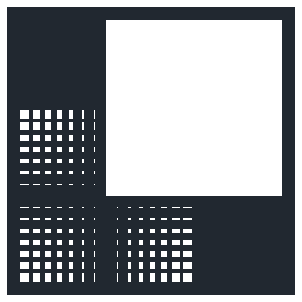

In [11]:
mask = DXF_mask_hatch(filename="240303 1 callibration hatch -",  cutting_dict=cutting_dict)

for i in range(len(X)):
    r0 = X[i], Y[i]
    size = widths_x[i], widths_y[i]
    mask.rectangle(r0, size, origin='0')
    
mask.rectangle(r0=(1.15*mask_size/2,1.15*mask_size/2), size=(1.15*mask_size,1.15*mask_size), origin='center')
    
mask.save()
mask.draw()

In [12]:
print("finished")

finished
